In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [2]:
with open('data_description.txt','r') as f:
    print(f.read())

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM

In [3]:
df_train=pd.read_csv("train.csv")
df_test=pd.read_csv("test.csv")
df_sub=pd.read_csv("sample_submission.csv")

In [4]:
df_train.head(20)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [5]:
df_test.head(20)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
5,1466,60,RL,75.0,10000,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal
6,1467,20,RL,NaN,7980,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,GdPrv,Shed,500,3,2010,WD,Normal
7,1468,60,RL,63.0,8402,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal
8,1469,20,RL,85.0,10176,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2010,WD,Normal
9,1470,20,RL,70.0,8400,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,4,2010,WD,Normal


In [6]:
df_sub.head()   # this is the predection

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977


In [103]:
df_train.shape

(1460, 81)

In [104]:
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [105]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [106]:
df_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [107]:
import seaborn as sns
import matplotlib.pyplot as plt

In [108]:
df_train.PoolQC.unique()

array([nan, 'Ex', 'Fa', 'Gd'], dtype=object)

In [109]:
df_train[(df_train.PoolQC.notnull())][['PoolQC','SalePrice']]

,PoolQC,SalePrice
197,Ex,235000
810,Fa,181000
1170,Gd,171000
1182,Ex,745000
1298,Gd,160000
1386,Fa,250000
1423,Gd,274970


<Axes: xlabel='PoolQC', ylabel='SalePrice'>

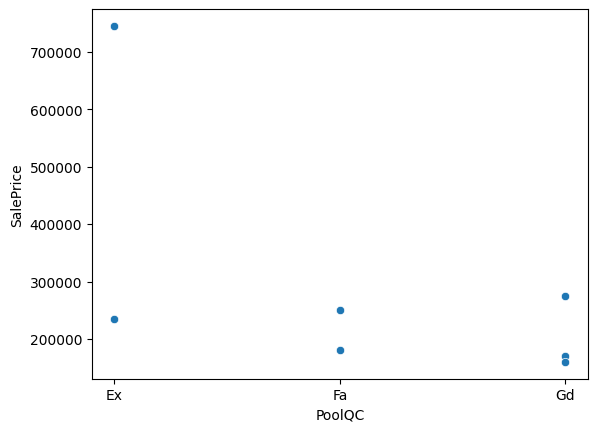

In [110]:
sns.scatterplot(df_train,x='PoolQC',y='SalePrice')

C:\Users\tbaka\AppData\Local\Temp\ipykernel_10072\4206785947.py:15: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(df,x='SalePrice',hue=l[i],ax=axis[2*i+1])
C:\Users\tbaka\AppData\Local\Temp\ipykernel_10072\4206785947.py:15: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(df,x='SalePrice',hue=l[i],ax=axis[2*i+1])


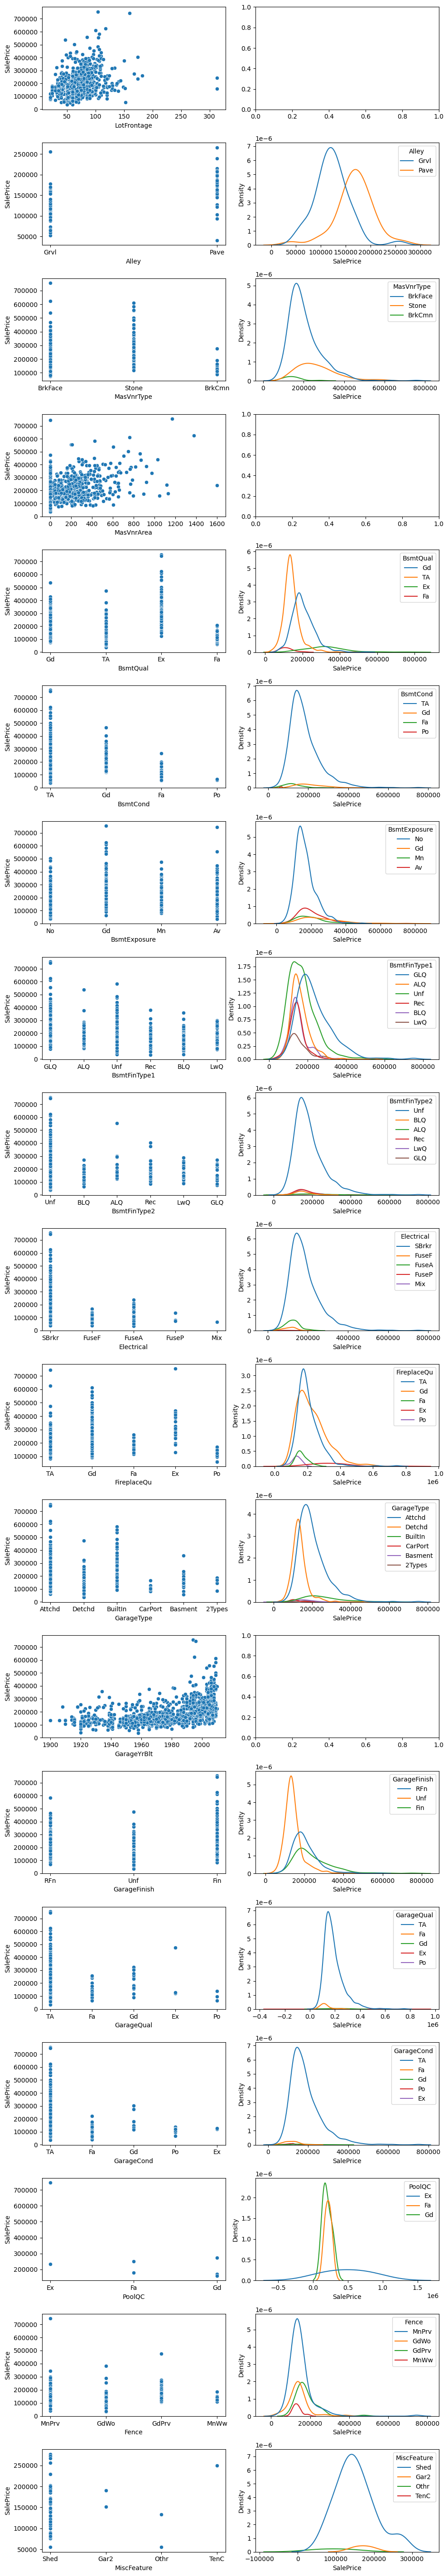

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
def plot(df):
    l=[]
    s=0
    for i in df.columns:
        c=df[i].isnull().sum()
        if c>0:
            s+=1
            l.append(i)
    fig, axis = plt.subplots(figsize=(10, 3*s),nrows=s, ncols=2)
    axis=axis.flatten()
    for i in range(len(l)):
        if df[l[i]].nunique()<8:
            sns.kdeplot(df,x='SalePrice',hue=l[i],ax=axis[2*i+1])
        sns.scatterplot(df, x=l[i],y='SalePrice', ax=axis[2*i])
    plt.tight_layout()
plot(df_train)

In [120]:
df_train['MasVnrType'].value_counts()

MasVnrType
BrkFace    445
Stone      128
BrkCmn      15
Name: count, dtype: int64

In [121]:
df_train['FireplaceQu'].value_counts()

FireplaceQu
Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: count, dtype: int64

In [122]:
df_train['LotFrontage'].value_counts()

LotFrontage
60.0     143
70.0      70
80.0      69
50.0      57
75.0      53
        ... 
137.0      1
141.0      1
38.0       1
140.0      1
46.0       1
Name: count, Length: 110, dtype: int64

In [123]:
df_train['BsmtCond'].value_counts()

BsmtCond
TA    1311
Gd      65
Fa      45
Po       2
Name: count, dtype: int64

In [124]:
df_train['BsmtQual'].value_counts()

BsmtQual
TA    649
Gd    618
Ex    121
Fa     35
Name: count, dtype: int64

In [125]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 77 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [126]:
# this function is use for rating
def rate_fill(v):
    if v == 'Ex':
        return 5
    elif v == 'Gd':
        return 4
    elif v == 'TA':
        return 3
    elif v == 'Fa':
        return 2
    elif v == 'Po':
        return 1
    else:
        return 0

# this function is user for MasVnrType 
def MasVnrType_fill(df):
    if df.MasVnrType:
        if df.MasVnrType == 'BrkFace':
            return 1
        elif df.MasVnrType == 'Stone':
            return 2
        else :
            return 0
    elif df.SalePrice >400000:
        return 2
    elif df.SalePrice >150000:
        return 1
    else:
        return 0


In [131]:
def clean(df_train):
    df_train.drop(['PoolQC','MiscFeature', 'Fence','GarageCars'], axis=1, inplace = True, errors= 'ignore')
    df_train['BsmtQual'] = df_train.apply(rate_fill)
    df_train['BsmtCond'] = df_train.apply(rate_fill)
    df_train['FireplaceQu']= df_train.apply(rate_fill)
    df_train['Alley'] = df_train.apply(lambda df_train : 0 if df_train.SalePrice < 160000 else 1, axis =1)
    df_train['MasVnrType'] = df_train.apply(lambda df_train: MasVnrType_fill(df_train), axis =1)
    df_train.LotFrontage.interpolate('linear',inplace=True)
    df_train = pd.get_dummies(df_train, columns=['GarageType', ''], drop_first=True, dtype='int')
    
    return df_train

In [133]:
#clean(df_train)

In [137]:
df_train['MasVnrArea'].isnull().value_counts()

MasVnrArea
False    1452
True        8
Name: count, dtype: int64

In [141]:
df_train['MasVnrArea'].value_counts()

MasVnrArea
0.0      861
180.0      8
72.0       8
108.0      8
120.0      7
        ... 
562.0      1
89.0       1
921.0      1
762.0      1
119.0      1
Name: count, Length: 327, dtype: int64

<Axes: xlabel='MasVnrArea', ylabel='SalePrice'>

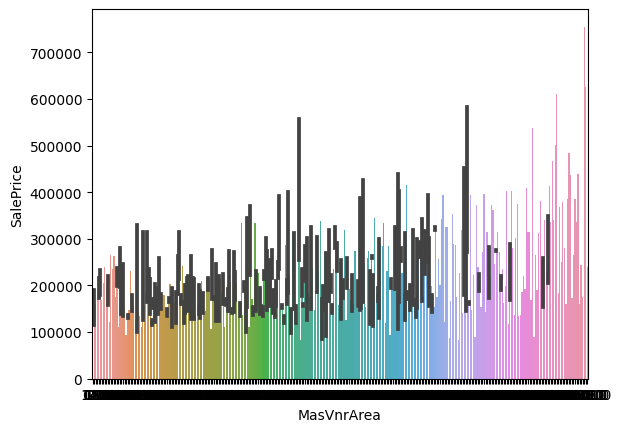

In [129]:
sns.barplot(x= 'MasVnrArea', y = 'SalePrice', data = df_train,)

<Axes: xlabel='MasVnrArea', ylabel='SalePrice'>

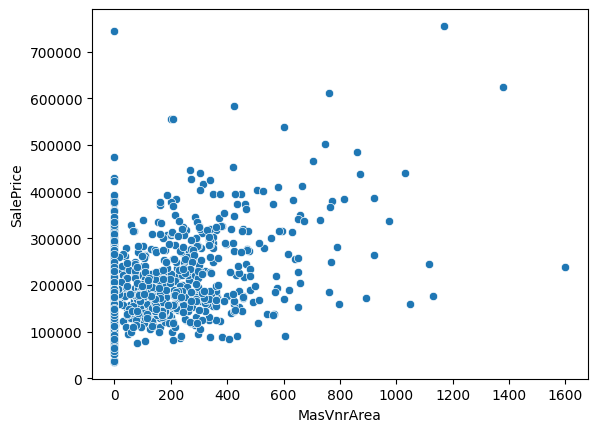

In [130]:
sns.scatterplot(df_train,x='MasVnrArea',y='SalePrice')

In [ ]:
# BsmtExposure: Refers to walkout or garden level walls

#        Gd	Good Exposure
#        Av	Average Exposure (split levels or foyers typically score average or above)	
#        Mn	Mimimum Exposure
#        No	No Exposure
#        NA	No Basement

In [144]:
df_train['BsmtExposure'].value_counts()

BsmtExposure
No    953
Av    221
Gd    134
Mn    114
Name: count, dtype: int64

In [147]:
df_train['BsmtExposure'].isnull().value_counts()

BsmtExposure
False    1422
True       38
Name: count, dtype: int64

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='SalePrice', ylabel='Density'>

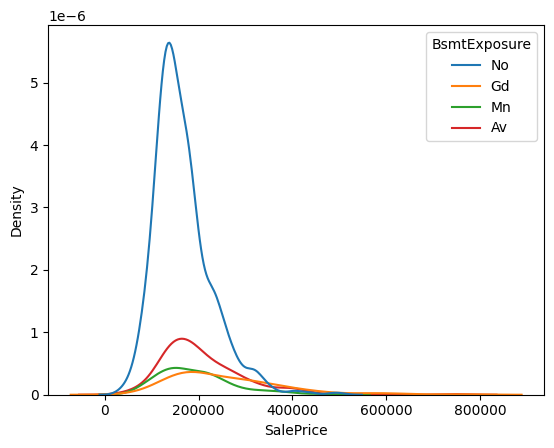

In [152]:
sns.kdeplot(df_train,x=df_train['SalePrice'],hue=df_train['BsmtExposure'])

<Axes: xlabel='BsmtExposure', ylabel='SalePrice'>

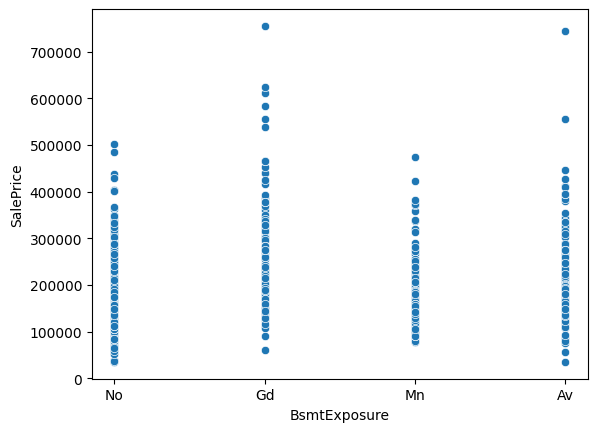

In [154]:
sns.scatterplot(df_train,x='BsmtExposure',y='SalePrice')

In [ ]:
# def bsmtexp(v):
#     if v == 'Gd':
#         return 4
#     elif v == 'Av':
#         return 2
#     elif v == 'Mn':
#         return 2
#     elif v == 'No':
#         return 1
#     else:
#         return 0


df_train.drop['BsmtExposure']

In [ ]:
# BsmtFinType2: Rating of basement finished area (if multiple types)

#        GLQ	Good Living Quarters
#        ALQ	Average Living Quarters
#        BLQ	Below Average Living Quarters	
#        Rec	Average Rec Room
#        LwQ	Low Quality
#        Unf	Unfinshed
#        NA	No Basement

In [155]:
df_train['BsmtFinType2'].value_counts()

BsmtFinType2
Unf    1256
Rec      54
LwQ      46
BLQ      33
ALQ      19
GLQ      14
Name: count, dtype: int64

In [157]:
df_train['BsmtFinType2'].isnull().value_counts()

BsmtFinType2
False    1422
True       38
Name: count, dtype: int64

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='SalePrice', ylabel='Density'>

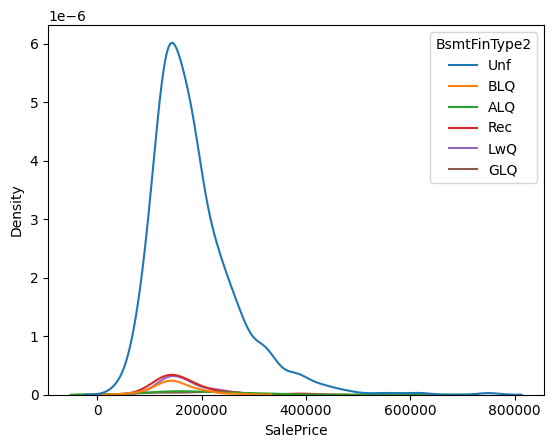

In [158]:
sns.kdeplot(df_train,x=df_train['SalePrice'],hue=df_train['BsmtFinType2'])

<Axes: xlabel='BsmtFinType2', ylabel='SalePrice'>

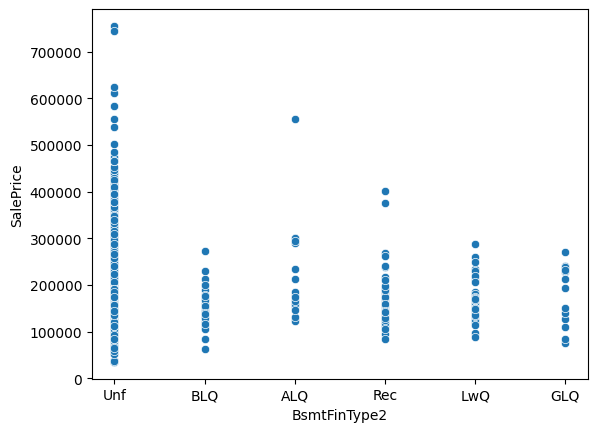

In [159]:
sns.scatterplot(df_train,x='BsmtFinType2',y='SalePrice')

In [ ]:
df_train.drop['BsmtFinType2']

In [162]:
# GarageYrBlt: Year garage was built
df_train['GarageYrBlt'].value_counts()

GarageYrBlt
2005.0    65
2006.0    59
2004.0    53
2003.0    50
2007.0    49
          ..
1927.0     1
1900.0     1
1906.0     1
1908.0     1
1933.0     1
Name: count, Length: 97, dtype: int64

In [163]:
df_train['GarageYrBlt'].isnull().value_counts()

GarageYrBlt
False    1379
True       81
Name: count, dtype: int64

<Axes: xlabel='GarageYrBlt', ylabel='SalePrice'>

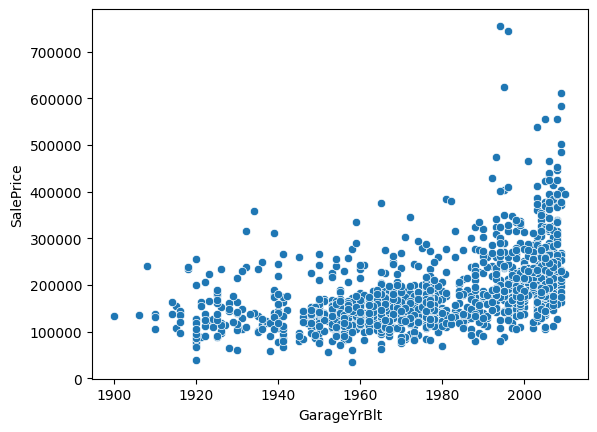

In [165]:
sns.scatterplot(df_train,x='GarageYrBlt',y='SalePrice')

In [ ]:
# GarageType: Garage location
		
#        2Types	More than one type of garage
#        Attchd	Attached to home
#        Basment	Basement Garage
#        BuiltIn	Built-In (Garage part of house - typically has room above garage)
#        CarPort	Car Port
#        Detchd	Detached from home
#        NA	No Garage

In [168]:
df_train['GarageType'].value_counts()

GarageType
Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: count, dtype: int64

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='SalePrice', ylabel='Density'>

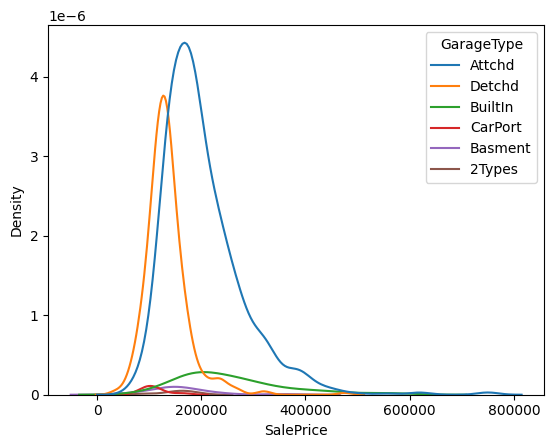

In [169]:
sns.kdeplot(df_train,x=df_train['SalePrice'],hue=df_train['GarageType'])

<Axes: xlabel='GarageType', ylabel='SalePrice'>

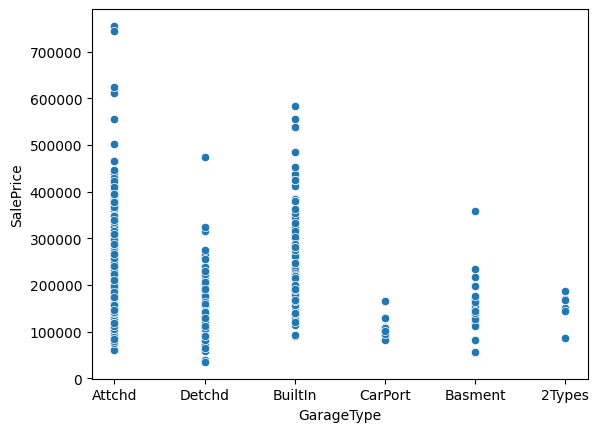

In [171]:
sns.scatterplot(df_train,x='GarageType',y='SalePrice')

In [166]:
# GarageFinish: Interior finish of the garage

#        Fin	Finished
#        RFn	Rough Finished	
#        Unf	Unfinished
#        NA	No Garage

In [167]:
df_train['GarageFinish'].value_counts()

GarageFinish
Unf    605
RFn    422
Fin    352
Name: count, dtype: int64

In [173]:
df_train['GarageFinish'].isnull().value_counts()

GarageFinish
False    1379
True       81
Name: count, dtype: int64

<Axes: xlabel='GarageFinish', ylabel='SalePrice'>

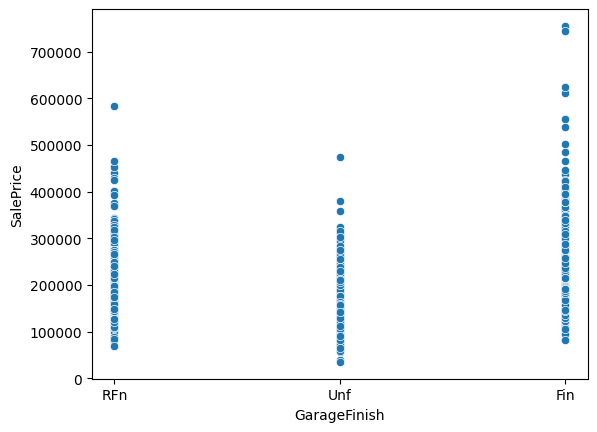

In [172]:
sns.scatterplot(df_train,x='GarageFinish',y='SalePrice')

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='SalePrice', ylabel='Density'>

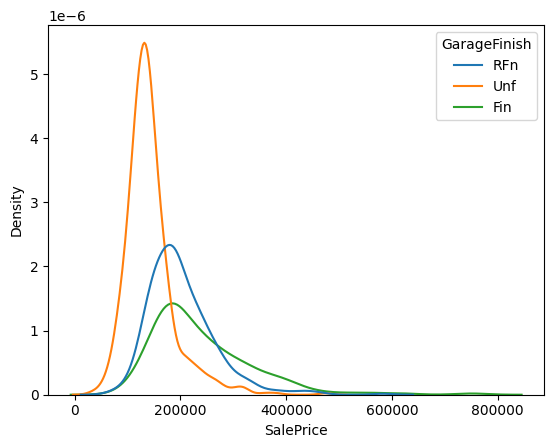

In [170]:
sns.kdeplot(df_train,x=df_train['SalePrice'],hue=df_train['GarageFinish'])

In [174]:
# GarageQual: Garage quality

#        Ex	Excellent
#        Gd	Good
#        TA	Typical/Average
#        Fa	Fair
#        Po	Poor
#        NA	No Garage
		

In [176]:
df_train['GarageQual'].value_counts()

GarageQual
TA    1311
Fa      48
Gd      14
Ex       3
Po       3
Name: count, dtype: int64

<Axes: xlabel='GarageQual', ylabel='SalePrice'>

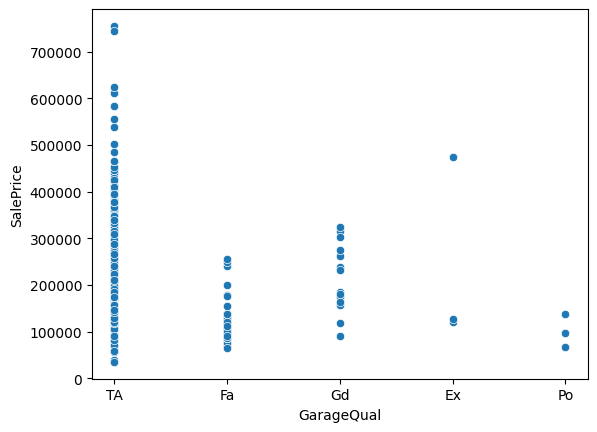

In [179]:
sns.scatterplot(df_train,x='GarageQual',y='SalePrice')

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='SalePrice', ylabel='Density'>

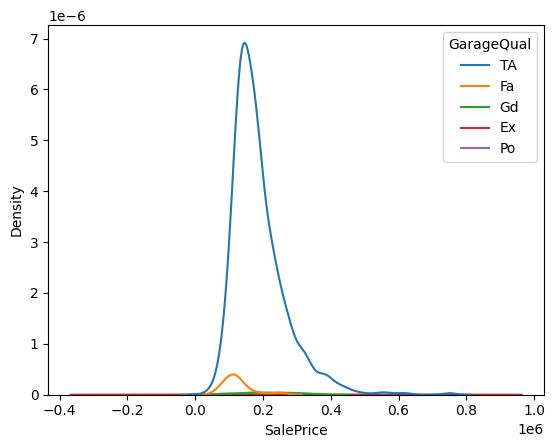

In [181]:
sns.kdeplot(df_train,x=df_train['SalePrice'],hue=df_train['GarageQual'])

In [ ]:
# GarageCond: Garage condition

#        Ex	Excellent
#        Gd	Good
#        TA	Typical/Average
#        Fa	Fair
#        Po	Poor
#        NA	No Garage

In [178]:
df_train['GarageCond'].value_counts()

GarageCond
TA    1326
Fa      35
Gd       9
Po       7
Ex       2
Name: count, dtype: int64

<Axes: xlabel='GarageQual', ylabel='SalePrice'>

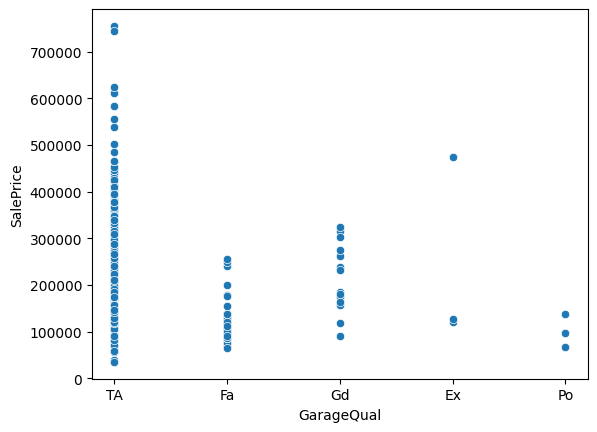

In [180]:
sns.scatterplot(df_train,x='GarageQual',y='SalePrice')

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='SalePrice', ylabel='Density'>

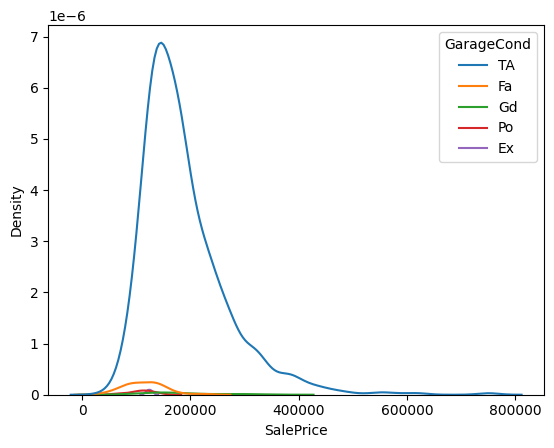

In [182]:
sns.kdeplot(df_train,x=df_train['SalePrice'],hue=df_train['GarageCond'])